In [21]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive


In [22]:
import pandas as pd

trainPath = '/content/drive/MyDrive/ML DS539/CoLab/training.csv'
df = pd.read_csv(trainPath)

#droping columns - state, Next_Year_Crime_Rate
df1 = df.drop(['state', 'Next_Year_Crime_Rate'], axis=1)

In [23]:
#split to training and testing sets
from sklearn.model_selection import train_test_split
import numpy as np

x = df1.drop('Next_Year_Top_10',axis=1).to_numpy()
y = df1['Next_Year_Top_10'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [24]:
#scaling since we'll probably need that for Softmax as well
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
# Softmax Regression (multinomial Logistic Regression)
from sklearn.linear_model import LogisticRegression

softReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
softReg.fit(x_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [26]:
y_pred = softReg.predict(x_test)

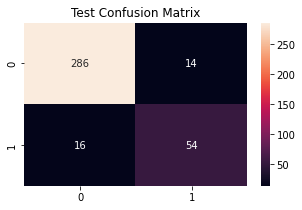

In [27]:
# Evaluate the model
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [28]:
# Evaluation Metrics
from sklearn.metrics import classification_report, hamming_loss

hloss = hamming_loss(y_test, y_pred)
print(f'Hamming Loss: {hloss}\n\n')
print(classification_report(y_test,y_pred))

Hamming Loss: 0.08108108108108109


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       300
         1.0       0.79      0.77      0.78        70

    accuracy                           0.92       370
   macro avg       0.87      0.86      0.87       370
weighted avg       0.92      0.92      0.92       370



In [29]:
# Load test data
testPath = '/content/drive/MyDrive/ML DS539/CoLab/testing.csv'
dfTest = pd.read_csv(testPath)

#dropping columns
dfTest1 = dfTest.drop(['state', 'Next_Year_Crime_Rate'], axis=1)

In [30]:
x1 = df1.drop('Next_Year_Top_10',axis=1).to_numpy()
y1 = df1['Next_Year_Top_10'].to_numpy()

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1)

In [31]:
#prediction on test
y_pred_test = softReg.predict(x1_test)

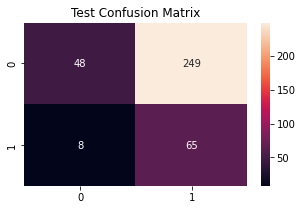

In [32]:
cm = confusion_matrix(y1_test, y_pred_test)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [33]:
#Evaluation for testing.csv

hloss_test = hamming_loss(y1_test, y_pred_test)

print(f'Hamming Loss: {hloss_test} \n\n')
print(classification_report(y1_test, y_pred_test))

Hamming Loss: 0.6945945945945946 


              precision    recall  f1-score   support

         0.0       0.86      0.16      0.27       297
         1.0       0.21      0.89      0.34        73

    accuracy                           0.31       370
   macro avg       0.53      0.53      0.30       370
weighted avg       0.73      0.31      0.28       370



In [35]:
# Scaling the Year column
x_train1 = df1.drop(['Next_Year_Top_10'], axis = 1)
x_test1 = dfTest1.drop(['Next_Year_Top_10'], axis=1)

y_train1 = df1['Next_Year_Top_10']
y_test1 = dfTest1['Next_Year_Top_10']

In [36]:
x_train1["year"] = [(1 + (i-1980)) for i in x_train1["year"]]
x_test1["year"] = [(1 + (i-1980)) for i in x_test1["year"]]

In [37]:
softReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
softReg.fit(x_train1,y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [40]:
pred = softReg.predict(x_test1)

In [41]:
hloss2 = hamming_loss(y_test1, pred)

print(f'Hamming Loss: {hloss2} \n\n')
print(classification_report(y_test1, pred))

Hamming Loss: 0.11764705882352941 


              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       205
         1.0       0.72      0.66      0.69        50

    accuracy                           0.88       255
   macro avg       0.82      0.80      0.81       255
weighted avg       0.88      0.88      0.88       255



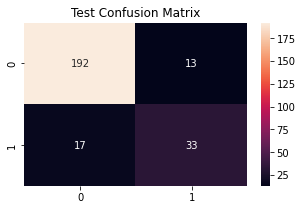

In [43]:
cm = confusion_matrix(y_test1, pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()